In [1]:
'''
婚恋配对实验模拟
    规则：
        1.按照规则生成 1万男性 + 1万女性样本
            * 在配对实验中，这2万样本具有各自不同的个人属性(财富、内涵、外貌)每项属性都有一个得分。
            * 财富值符合指数分布，内涵和颜值符合正太分布
            * 三项平均值都为60分，标准差为15分
        2.模拟实验。基于现实世界的提炼以及适度的简化，我们概况了三个最主流的择偶策略：
            * 策略1：门当户对
                -- 要求双方三项指标加和的总分接近，差值不超过20分
            * 策略2：男才女貌
                -- 男性要求女性的外貌分比自己高出至少10分，女性要求男性的财富比自己高出至少10分
            * 策略3：志趣相投
                -- 要求对方的内涵得分在比自己低10分~高10分的区间内，且外貌和财富两项与自己的得分差值都在5分以内
        3.每一轮实验中，我们将三种策略随机平分给所有样本(即采用每种策略的男性有3333个样本)
        4.我们为每位单身男女随机选择一个对象，若双方互相符合要求就算配对成功，配对失败的男女则进入下一轮配对。
        
    要求：
        1.构建函数实现样本数据生成模型，函数参数之一为“样本数量”，并用该模型生成1万男性+1万女性样本数据。
        2.绘制柱状图来查看每个人的属性分值情况
    
    提示：
        1.正太分布：np.random.normal(loc=60,scale=15,size=n)
        2.指数分布：np.random.normal(scale=15,size=n) + 45
'''

'\n婚恋配对实验模拟\n    规则：\n        1.按照规则生成 1万男性 + 1万女性样本\n            * 在配对实验中，这2万样本具有各自不同的个人属性(财富、内涵、外貌)每项属性都有一个得分。\n            * 财富值符合指数分布，内涵和颜值符合正太分布\n            * 三项平均值都为60分，标准差为15分\n        2.模拟实验。基于现实世界的提炼以及适度的简化，我们概况了三个最主流的择偶策略：\n            * 策略1：门当户对\n                -- 要求双方三项指标加和的总分接近，差值不超过20分\n            * 策略2：男才女貌\n                -- 男性要求女性的外貌分比自己高出至少10分，女性要求男性的财富比自己高出至少10分\n            * 策略3：志趣相投\n                -- 要求对方的内涵得分在比自己低10分~高10分的区间内，且外貌和财富两项与自己的得分差值都在5分以内\n        3.每一轮实验中，我们将三种策略随机平分给所有样本(即采用每种策略的男性有3333个样本)\n        4.我们为每位单身男女随机选择一个对象，若双方互相符合要求就算配对成功，配对失败的男女则进入下一轮配对。\n        \n    要求：\n        1.构建函数实现样本数据生成模型，函数参数之一为“样本数量”，并用该模型生成1万男性+1万女性样本数据。\n        2.绘制柱状图来查看每个人的属性分值情况\n    \n    提示：\n        1.正太分布：np.random.normal(loc=60,scale=15,size=n)\n        2.指数分布：np.random.normal(scale=15,size=n) + 45\n'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import time # 导入常用模块

import warnings
warnings.filterwarnings('ignore') # 不发出警告

from bokeh.plotting import figure,show,output_file
from bokeh.models import  ColumnDataSource,HoverTool # 导入绘图模块

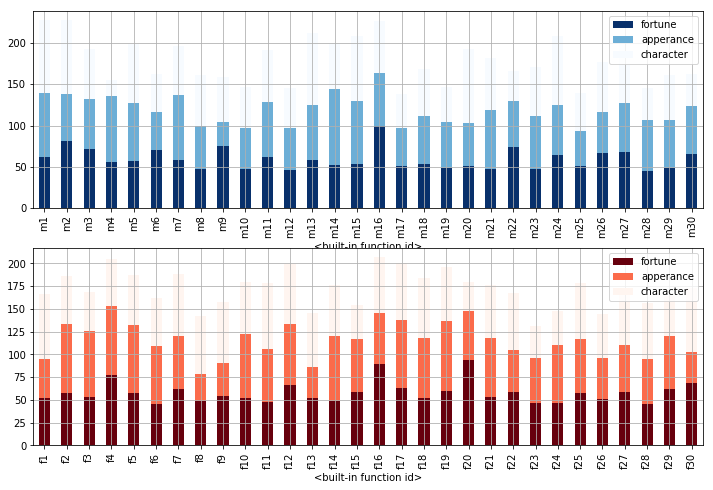

In [7]:
# 造数据
# data_norm = pd.DataFrame({'正太分布':np.random.normal(loc=60,scale=15,size=10000)})
# data_exp = pd.DataFrame({'指数分布':np.random.exponential(scale=15,size=10000) + 45})

# 绘图查看是否为正太分布 和 指数分布 数据
# fig,axes = plt.subplots(1,2,figsize=(12,4))
# data_norm.hist(bins=50)
# data_exp.hist(bins=50)

# 构建函数生成样本数据
def create_sample(n,gender):
    sample_data = pd.DataFrame({'fortune':np.random.exponential(scale=15,size=n) + 45,
                               'apperance':np.random.normal(loc=60,scale=15,size=n),
                               'character':np.random.normal(loc=60,scale=15,size=n)},
                               index=[gender + str(i) for i in range(1,n+1)])
    sample_data.index.name = id
    sample_data['score'] = sample_data.sum(axis=1)/3
    return sample_data

sample_m = create_sample(10000,'m')
sample_f = create_sample(10000,'f')

fig,axes = plt.subplots(2,1,figsize=(12,8))
sample_m[['fortune','apperance','character']].iloc[:30].plot(kind='bar',colormap='Blues_r',stacked=True,grid=True,ax=axes[0])
sample_f[['fortune','apperance','character']].iloc[:30].plot(kind='bar',colormap='Reds_r',stacked=True,grid=True,ax=axes[1])

In [ ]:
'''
问题2：
    * 生成99个男性和99个女性的数据，分别针对三种策略构建算法函数
        -- 策略1： 门当户对(略)
        -- 策略2：男才女貌(略)
        -- 策略3：志趣相投(略)
        -- 每轮实验中，我们将三种策略随机平分给所有样本，这里则是三种策略分别33人
        -- 这里不同策略的匹配结果可能重合，所有简化了模型
            ** 先进行策略1模拟
            ** 模拟完成后减去该轮匹配成功的女性数据，再进行策略2模拟
            ** 模拟完成后再减去，匹配成功的女性数据，进行策略3的模拟
    
    * 要求
        -- 生成样本数据
        -- 给男性样本数据，随机分配策略选择
            ** 这里以男性为出发作为策略选择方
        -- 尝试做第一轮匹配，记录成功的匹配对象，并筛选出失败的男女进入下一轮匹配
        -- 构建模型，并模拟1万男性 和 1万女性的匹配实验
        -- 通过数据分析，回答几个问题：
            ** 百分之多少的样本数据成功匹配了对象？
            ** 采取不同择偶策略的匹配成功率分别是多少？
            ** 采取不同择偶策略的男性各项平均分是多少？
    
    * 提示：
        -- 择偶策略评判标准
            ** 若匹配成功 则该男性与被匹配额该女性这一轮都算成功，并且退出游戏
            ** 若匹配失败 则该男性与被匹配的女性 进入下一轮匹配
            ** 若同时多个男性选择同一女性，且满足成功配对的要求，则综合评分高的男性算为匹配成功
        -- 构建一个 空的数据集，用于存储匹配成功的数据
        -- 每一轮匹配之后，删除成功匹配的数据之后，进入下一轮，这里删除数据用df.drop()
        -- 这里建议用while去做迭代
            ** 当该轮没有任何配对成功，则停止实验
'''

In [84]:
# 创建样本数据
sample_m_test = create_sample(99,'m')
sample_f_test = create_sample(99,'f')
sample_m_test['strategy'] = np.random.choice([1,2,3],99)

# 创建空数据库
match_success = pd.DataFrame(columns=['m','f','round_n','strategy_type'])

# 复制数据
round1_f = sample_f_test.copy()
round1_m = sample_m_test.copy()

# 该轮的 匹配选择
round1_m['choice'] = np.random.choice(round1_f.index,len(round1_m))

# 合并与计算数据
round1_match = pd.merge(round1_m,round1_f,left_on='choice',right_index=True).reset_index()
round1_match['score_dis'] = np.abs(round1_match['score_x'] - round1_match['score_y']) # 计算综合评分差值
round1_match['cha_dis'] = np.abs(round1_match['character_x'] - round1_match['character_y']) # 计算内涵得分差值
round1_match['for_dis'] = np.abs(round1_match['fortune_x'] - round1_match['fortune_y']) # 计算财富得分差值
round1_match['app_dis'] = np.abs(round1_match['apperance_x'] - round1_match['apperance_y']) # 计算外貌得分差值

round1_match

,<built-in function id>,fortune_x,apperance_x,character_x,score_x,strategy,choice,fortune_y,apperance_y,character_y,score_y,score_dis,cha_dis,for_dis,app_dis
0,m1,46.110530,82.183670,76.058242,68.117481,1,f14,62.473917,69.860331,54.658000,62.330749,5.786731,21.400242,16.363387,12.323340
1,m19,76.722804,59.877811,52.152606,62.917740,1,f14,62.473917,69.860331,54.658000,62.330749,0.586991,2.505393,14.248886,9.982520
2,m2,58.865647,61.075875,45.723877,55.221800,1,f71,45.403097,38.882098,37.893137,40.726111,14.495689,7.830739,13.462550,22.193777
3,m18,54.282795,55.292210,76.599959,62.058321,1,f71,45.403097,38.882098,37.893137,40.726111,21.332211,38.706822,8.879698,16.410112
4,m3,46.446565,76.201177,53.653861,58.767201,2,f19,56.634658,58.340394,78.858877,64.611310,5.844109,25.205015,10.188093,17.860782
5,m4,52.359135,65.540504,48.088814,55.329484,1,f11,51.550890,65.614284,61.624064,59.596413,4.266928,13.535250,0.808245,0.073780
6,m63,53.556724,50.597933,50.774974,51.643210,2,f11,51.550890,65.614284,61.624064,59.596413,7.953203,10.849090,2.005834,15.016352
7,m5,78.615402,70.220282,60.047183,69.627623,3,f65,53.492952,75.507060,49.464238,59.488083,10.139539,10.582946,25.122450,5.286778
8,m6,46.984340,60.023413,75.902076,60.969943,3,f65,53.492952,75.507060,49.464238,59.488083,1.481860,26.437838,6.508612,15.483647
9,m7,57.595838,35.559525,81.386345,58.180569,1,f89,55.483076,65.349556,69.995969,63.609534,5.428965,11.390376,2.112761,29.790031


In [83]:
# 就算第一轮数据(测试轮)
# 策略1：门当户对
round1_s1_m = round1_match[round1_match['strategy'] == 1]
round1_s1_success = round1_s1_m[round1_s1_m['score_dis'] <= 20].groupby('choice').max() # 因为这里会出现 一个女性牵手 多个男性的情况，所以需要groupby 和 max
# 因为通过上一步 id 也跟着排序了 所以这里需要重新匹配score高的 男性ID (又因为round1_m 中的id 为index 所以需要加上一个 reset_index() 方法 来区分)
round1_s1_success = pd.merge(round1_s1_success,round1_m.reset_index(),left_on='score_x',right_on='score')[['<built-in function id>_y','choice']]
round1_s1_success.columns = ['m','f']
round1_s1_success['strategy_type'] = 1
round1_s1_success['round_n'] = 1 # 成功得到策略1的匹配结果
round1_match.index = round1_match['choice']  # 把round1_match的 index 至为 choice
round1_match = round1_match.drop(round1_s1_success['f'].tolist()) # 把匹配成功的嘉宾 删除

# 策略2：男才女貌
round1_s2_m = round1_match[round1_match['strategy'] == 2]
round1_s2_success = round1_s2_m[(round1_s2_m['fortune_x'] - round1_s2_m['fortune_y'] >= 10) &
                               (round1_s2_m['apperance_y'] - round1_s2_m['apperance_x'] >= 10)]
round1_s2_success = round1_s2_success.groupby('choice').max()
round1_s2_success = pd.merge(round1_s2_success,round1_m.reset_index(),left_on='score_x',right_on='score')[['<built-in function id>_y','choice']]
round1_s2_success.columns = ['m','f']
round1_s2_success['strategy_type'] = 2
round1_s2_success['round_n'] = 1 # 成功得到策略1的匹配结果
round1_match.index = round1_match['choice']  # 把round1_match的 index 至为 choice
round1_match = round1_match.drop(round1_s2_success['f'].tolist()) # 把匹配成功的嘉宾 删除

# 策略3：志趣相投
round1_s3_m = round1_match[round1_match['strategy'] == 3]
round1_s3_success = round1_s3_m[(round1_s3_m['cha_dis'] <= 10) & # 内涵分差在10分以内
                                (round1_s3_m['for_dis'] <= 5) & # 财富分差在5分以内
                                (round1_s3_m['app_dis'] <= 5)] # 外貌分差也在5分以内
round1_s3_success = round1_s3_success.groupby('choice').max()
round1_s3_success = pd.merge(round1_s3_success,round1_m.reset_index(),left_on='score_x',right_on='score')[['<built-in function id>_y','choice']]
round1_s3_success.columns = ['m','f']
round1_s3_success['strategy_type'] = 3
round1_s2_success['round_n'] = 1 # 成功得到策略1的匹配结果
round1_match.index = round1_match['choice']  # 把round1_match的 index 至为 choice
round1_match = round1_match.drop(round1_s3_success['f'].tolist()) # 把匹配成功的嘉宾 删除                              

# 筛选出这轮匹配成功的数据
match_success = pd.concat([match_success,round1_s1_success,round1_s2_success,round1_s3_success])

# 筛选出 下一轮的实验数据
round2_m = round1_m.drop(match_success['m'].tolist())
round2_f = round1_f.drop(match_success['f'].tolist())

len(match_success.index)

32

In [87]:
# 建立模型
def different_strategy(data_m,data_f,roundnum):
    data_m['choice'] = np.random.choice(data_f.index,len(data_m))
    
    # 合并与计算数据
    round_match = pd.merge(data_m,data_f,left_on='choice',right_index=True).reset_index()
    round_match['score_dis'] = np.abs(round_match['score_x'] - round_match['score_y']) # 计算综合评分差值
    round_match['cha_dis'] = np.abs(round_match['character_x'] - round_match['character_y']) # 计算内涵得分差值
    round_match['for_dis'] = np.abs(round_match['fortune_x'] - round_match['fortune_y']) # 计算财富得分差值
    round_match['app_dis'] = np.abs(round_match['apperance_x'] - round_match['apperance_y']) # 计算外貌得分差值
    
    # 策略1：门当户对
    s1_m = round_match[round_match['strategy'] == 1]
    s1_success = s1_m[s1_m['score_dis'] <= 20].groupby('choice').max() # 因为这里会出现 一个女性牵手 多个男性的情况，所以需要groupby 和 max
    # 因为通过上一步 id 也跟着排序了 所以这里需要重新匹配score高的 男性ID (又因为round1_m 中的id 为index 所以需要加上一个 reset_index() 方法 来区分)
    s1_success = pd.merge(s1_success,data_m.reset_index(),left_on='score_x',right_on='score')[['<built-in function id>_y','choice']]
    s1_success.columns = ['m','f']
    s1_success['strategy_type'] = 1
    s1_success['round_n'] = roundnum # 成功得到策略1的匹配结果
    round_match.index = round_match['choice']  # 把round_match的 index 至为 choice
    round_match = round_match.drop(s1_success['f'].tolist()) # 把匹配成功的嘉宾 删除
    
    # 策略2：男才女貌
    s2_m = round_match[round_match['strategy'] == 2]
    s2_success = s2_m[(s2_m['fortune_x'] - s2_m['fortune_y'] >= 10) &
                            (s2_m['apperance_y'] - s2_m['apperance_x'] >= 10)]
    s2_success = s2_success.groupby('choice').max()
    s2_success = pd.merge(s2_success,data_m.reset_index(),left_on='score_x',right_on='score')[['<built-in function id>_y','choice']]
    s2_success.columns = ['m','f']
    s2_success['strategy_type'] = 2
    s2_success['round_n'] = roundnum # 成功得到策略1的匹配结果
    round_match.index = round_match['choice']  # 把round_match的 index 至为 choice
    round_match = round_match.drop(s2_success['f'].tolist()) # 把匹配成功的嘉宾 删除

    # 策略3：志趣相投
    s3_m = round_match[round_match['strategy'] == 3]
    s3_success = s3_m[(s3_m['cha_dis'] <= 10) & # 内涵分差在10分以内
                            (s3_m['for_dis'] <= 5) & # 财富分差在5分以内
                             (s3_m['app_dis'] <= 5)] # 外貌分差也在5分以内
    s3_success = s3_success.groupby('choice').max()
    s3_success = pd.merge(s3_success,data_m.reset_index(),left_on='score_x',right_on='score')[['<built-in function id>_y','choice']]
    s3_success.columns = ['m','f']
    s3_success['strategy_type'] = 3
    s3_success['round_n'] = roundnum # 成功得到策略1的匹配结果
    round_match.index = round_match['choice']  # 把round1_match的 index 至为 choice
    round_match = round_match.drop(s3_success['f'].tolist()) # 把匹配成功的嘉宾 删除    
    
    data_success = pd.concat([s1_success,s2_success,s3_success])
    
    return data_success

len(different_strategy(round1_m,round1_f,1).index)
    

34

In [101]:
# 运行模型
# 创造基本数据
sample_m_test = create_sample(10000,'m')
sample_f_test = create_sample(10000,'f')
sample_m_test['strategy'] = np.random.choice([1,2,3],10000)

# 复制实验数据
test_m1 = sample_m_test.copy()
test_f1 = sample_f_test.copy()

# 设置起始时间 和 设定实验次数变量
starttime = time.time()
n = 1

#初始化 第一轮 匹配
success_roundn = different_strategy(test_m1,test_f1,n)
match_success1 = success_roundn
test_m1 = test_m1.drop(success_roundn['m'].tolist())
test_f1 = test_f1.drop(success_roundn['f'].tolist())
print('成功进行了%i轮实验，本轮实验成功匹配%i对，总共成功匹配%i对，还剩下%i位男性 和 %i位女性' % 
     (n,len(success_roundn),len(match_success1),len(test_m1),len(test_f1)))


while len(success_roundn) != 0:
    n += 1
    success_roundn = different_strategy(test_m1,test_f1,n)
    match_success1 = pd.concat([match_success1,success_roundn])
    test_m1 = test_m1.drop(success_roundn['m'].tolist())
    test_f1 = test_f1.drop(success_roundn['f'].tolist())
    print('成功进行了%i轮实验，本轮实验成功匹配%i对，总共成功匹配%i对，还剩下%i位男性 和 %i位女性' % 
         (n,len(success_roundn),len(match_success1),len(test_m1),len(test_f1)))
    

endtime = time.time() # 记录结束时间

print('--------------')
print('本次实验一共进行了%i轮，成功匹配了%i对\n-------------' % (n,len(match_success1)))
print('本次实验共耗时%.2f秒' %(endtime - starttime))


成功进行了1轮实验，本轮实验成功匹配2833对，总共成功匹配2833对，还剩下7167位男性 和 7167位女性
成功进行了2轮实验，本轮实验成功匹配787对，总共成功匹配3620对，还剩下6380位男性 和 6380位女性
成功进行了3轮实验，本轮实验成功匹配281对，总共成功匹配3901对，还剩下6099位男性 和 6099位女性
成功进行了4轮实验，本轮实验成功匹配182对，总共成功匹配4083对，还剩下5917位男性 和 5917位女性
成功进行了5轮实验，本轮实验成功匹配125对，总共成功匹配4208对，还剩下5792位男性 和 5792位女性
成功进行了6轮实验，本轮实验成功匹配124对，总共成功匹配4332对，还剩下5668位男性 和 5668位女性
成功进行了7轮实验，本轮实验成功匹配89对，总共成功匹配4421对，还剩下5579位男性 和 5579位女性
成功进行了8轮实验，本轮实验成功匹配102对，总共成功匹配4523对，还剩下5477位男性 和 5477位女性
成功进行了9轮实验，本轮实验成功匹配79对，总共成功匹配4602对，还剩下5398位男性 和 5398位女性
成功进行了10轮实验，本轮实验成功匹配77对，总共成功匹配4679对，还剩下5321位男性 和 5321位女性
成功进行了11轮实验，本轮实验成功匹配75对，总共成功匹配4754对，还剩下5246位男性 和 5246位女性
成功进行了12轮实验，本轮实验成功匹配80对，总共成功匹配4834对，还剩下5166位男性 和 5166位女性
成功进行了13轮实验，本轮实验成功匹配62对，总共成功匹配4896对，还剩下5104位男性 和 5104位女性
成功进行了14轮实验，本轮实验成功匹配58对，总共成功匹配4954对，还剩下5046位男性 和 5046位女性
成功进行了15轮实验，本轮实验成功匹配67对，总共成功匹配5021对，还剩下4979位男性 和 4979位女性
成功进行了16轮实验，本轮实验成功匹配45对，总共成功匹配5066对，还剩下4934位男性 和 4934位女性
成功进行了17轮实验，本轮实验成功匹配53对，总共成功匹配5119对，还剩下4881位男性 和 4881位女性
成功进行了18轮实验，本轮实验成功匹配44对，总共成功匹配5163对，还剩下4837位男性 和 4

成功进行了148轮实验，本轮实验成功匹配6对，总共成功匹配7035对，还剩下2965位男性 和 2965位女性
成功进行了149轮实验，本轮实验成功匹配9对，总共成功匹配7044对，还剩下2956位男性 和 2956位女性
成功进行了150轮实验，本轮实验成功匹配4对，总共成功匹配7048对，还剩下2952位男性 和 2952位女性
成功进行了151轮实验，本轮实验成功匹配5对，总共成功匹配7053对，还剩下2947位男性 和 2947位女性
成功进行了152轮实验，本轮实验成功匹配0对，总共成功匹配7053对，还剩下2947位男性 和 2947位女性
--------------
本次实验一共进行了152轮，成功匹配了7053对
-------------
本次实验共耗时40.14秒


该样本中一共有 71.74% 的样本数据成功匹配到了对象
----------------
择偶策略1的匹配成功率为99.97%
择偶策略2的匹配成功率为37.32%
择偶策略3的匹配成功率为77.99%
------------------------
选择策略1的男性 -> 财富均值为：60.18,内涵均值为：59.84,外貌均值为：60.01,
选择策略2的男性 -> 财富均值为：73.34,内涵均值为：59.01,外貌均值为：55.35,
选择策略3的男性 -> 财富均值为：57.95,内涵均值为：60.07,外貌均值为：58.12,


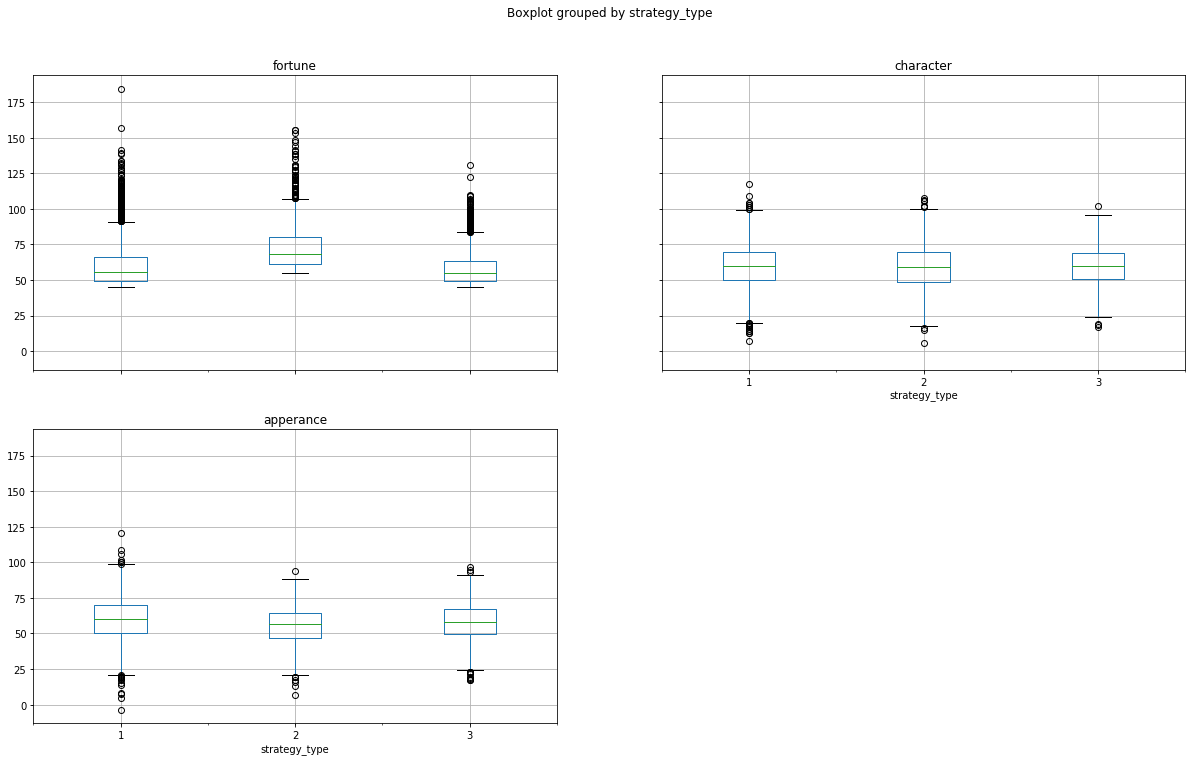

In [100]:
'''
-- 通过数据分析，回答几个问题：
    1.** 百分之多少的样本数据成功匹配了对象？
    2.** 采取不同择偶策略的匹配成功率分别是多少？
    3.** 采取不同择偶策略的男性各项平均分是多少？
'''

# 问题 1.** 百分之多少的样本数据成功匹配了对象？
print('该样本中一共有 %.2f%% 的样本数据成功匹配到了对象\n----------------' %(len(match_success1) / len(sample_m_test)*100))

# 问题 2.** 采取不同择偶策略的匹配成功率分别是多少？
print('择偶策略1的匹配成功率为%.2f%%' % (len(match_success1[match_success1['strategy_type']==1]) / len(sample_m_test[sample_m_test['strategy']==1])*100))
print('择偶策略2的匹配成功率为%.2f%%' % (len(match_success1[match_success1['strategy_type']==2]) / len(sample_m_test[sample_m_test['strategy']==2])*100))
print('择偶策略3的匹配成功率为%.2f%%' % (len(match_success1[match_success1['strategy_type']==3]) / len(sample_m_test[sample_m_test['strategy']==3])*100))

# 问题 3.** 采取不同择偶策略的男性各项平均分是多少？
match_m1 = pd.merge(match_success1,sample_m_test,left_on='m',right_index=True)
result_df = pd.DataFrame([{'财富均值':match_m1[match_m1['strategy_type'] == 1]['fortune'].mean(),
                           '内涵均值':match_m1[match_m1['strategy_type'] == 1]['character'].mean(),
                           '外貌均值':match_m1[match_m1['strategy_type'] == 1]['apperance'].mean()},
                         {'财富均值':match_m1[match_m1['strategy_type'] == 2]['fortune'].mean(),
                          '内涵均值':match_m1[match_m1['strategy_type'] == 2]['character'].mean(),
                          '外貌均值':match_m1[match_m1['strategy_type'] == 2]['apperance'].mean()},
                          {'财富均值':match_m1[match_m1['strategy_type'] == 3]['fortune'].mean(),
                          '内涵均值':match_m1[match_m1['strategy_type'] == 3]['character'].mean(),
                          '外貌均值':match_m1[match_m1['strategy_type'] == 3]['apperance'].mean()}],
                         index = ['择偶策略1','择偶策略2','择偶策略3'])

print('------------------------')
print('选择策略1的男性 -> 财富均值为：%.2f,内涵均值为：%.2f,外貌均值为：%.2f,' %
     (result_df.loc['择偶策略1']['财富均值'],result_df.loc['择偶策略1']['内涵均值'],result_df.loc['择偶策略1']['外貌均值']))
print('选择策略2的男性 -> 财富均值为：%.2f,内涵均值为：%.2f,外貌均值为：%.2f,' %
     (result_df.loc['择偶策略2']['财富均值'],result_df.loc['择偶策略2']['内涵均值'],result_df.loc['择偶策略2']['外貌均值']))
print('选择策略3的男性 -> 财富均值为：%.2f,内涵均值为：%.2f,外貌均值为：%.2f,' %
     (result_df.loc['择偶策略3']['财富均值'],result_df.loc['择偶策略3']['内涵均值'],result_df.loc['择偶策略3']['外貌均值']))

# 绘制箱型图
match_m1.boxplot(column=['fortune','character','apperance'],by='strategy_type',figsize=(20,12),grid = True)
plt.ylim(0,150)
plt.show()

In [ ]:
'''
问题3.以99男 + 99女 的样本数据，绘制匹配折线图
    要求：
        -- 生成样本数据，模拟匹配实验
        -- 生成绘制数据表格
        -- bokeh制图
            ** 这里设置图例，并且可交互(消隐模式)
    
    提示：
        -- bokeh制图时 y轴为男性，x轴为女性
        -- 需要把男女的数字编号提取出来，这样图表横纵轴好识别
        -- bokeh绘制折线图示意：p.line([0,女性数字编号，女性数字编号],[男性数字编号，男性数字编号,0])
'''